# Notebook Consolidación
### Objetivos
 Formateo y consolidación de los datos obtenidos por web scraping

Librerías

In [1]:
import pandas as pd
import re
import numpy as np

**Funcioines de formato**

Ya teniendo los datos tabulados, el formato a los datos se debe concentrar en el contenido de cada columna. Varios de los datos tienen caracteres e informacion irrelevante para el proyecto, por tanto, se crea una función que se encarga de hacer esa limpieza

In [2]:
def format_column(df: pd.DataFrame, columns: list, cat_columns: list) -> None:
    """
    Fonción para eliminar valores irrelevantes de las columnas

    PARAMS
        df: DataFrame
            Datos tabulados
        columns: list
            Lista con las columnas de la base
        cat_columns: list
            Lista con las columnas categóricas
    """
    for column in columns:
        if column not in cat_columns:
            if column == "precio":
                df[column] = df[column].apply(lambda x: x.replace("EN ARRIENDO $", "").replace(",",""))
            else:
                df[column] = df[column].apply(lambda x: re.findall('\d+', x)[0])
        else:
            if column == "zona":
                df[column] = df[column].apply(lambda x: x.lower().replace("apartamento en arriendo ", ""))
            df[column] = df[column].apply(lambda x: str(x).lower().strip())

Se crean dos listas auxiliares para identificar las columnas numéricas de aquellas categóricas

In [3]:
# Lista de columnas numéricas
num_colums = ['precio',
              'baños_familiares',
              'area_bruta',
              'numero_niveles',
              'parqueaderos',
              'alcobas_familiares',
              'estrato',
              'area_total',
              'juegos_infantiles',
              'balcon', 
              'zona_ropas', 
              'camaras_cctv', 
              'cancha_polideportiva',
              'ascensor', 
              'cancha_squash', 
              'zona_bbq', 
              'patio',
              'unidad_cerrada_conjunto', 
              'zonas_verdes', 
              'aire_acondicionado',
              'jacuzzi', 
              'red_de_Gas', 
              'turco', 
              'porteria_24_7', 
              'sauna',
              'calentador_de_agua', 
              'terraza', 
              'closet_de_linos', 
              'biblioteca',
              'parqueadero_visitantes', 
              'gimnasio', 
              'piscina', 
              'salon_social',
              'dispositivos_automatizacion', 
              'alarma']

# Lista de columnas numéricas
cat_columns = ['zona', 
               'barrio_sector', 
               'tipo_pisos',
               'ciudad', 
               'tipo_cocina']

**Columnas a formatear**

Cada una de las zonas contiene las mismas columnas, se define el listado de las columnas que se deben formatear en cada uno de los grupos de datos

In [4]:
columns_to_format = ["precio",
                     "baños_familiares", 
                     "area_bruta", 
                     "parqueaderos", 
                     "alcobas_familiares", 
                     "area_total", 
                     *cat_columns]

**Lectura y formato de datos**

Al estar los datos separados por zonas, se lee cada grupo y se aplica el formato

**Nota: Lo desarrollado a continuación se realizará sobre los datos en la carpeta _datos_modelos_**

**Zona 1 Centro**

In [5]:
# Lectura de los datos
data_scraping_zona_1 = pd.read_csv(r'datos_modelo\resultados_procesar_datos\data_zona_1.csv', encoding='utf-8')
data_scraping_zona_1 = data_scraping_zona_1.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_1.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306444 / Castilla,"EN ARRIENDO $1,100,000",Apartamento en Arriendo Castilla Medellin,Castilla,Ceramica,1 + Baño de servicio,95 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integral,...,0,1,1,1,0,0,0,0,0,0
1,Código 1306376 / El Salvador,"EN ARRIENDO $950,000",Apartamento en Arriendo El Salvador Medellin,El Salvador,Ceramica,1,70 M2. aproximadamente,Medellin Zona 1 - Centro,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
2,Código 1306287 / Los Angeles,"EN ARRIENDO $970,000",Apartamento en Arriendo Los Angeles Medellin,Los Angeles,Ceramica,1,38 M2. aproximadamente,Medellin Zona 1 - Centro,1,Semi-Integral,...,0,0,1,0,0,0,0,0,0,0
3,Código 1306212 / Prado,"EN ARRIENDO $1,400,000",Apartamento en Arriendo Prado Medellin,Prado,Ceramica,1,50 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integral,...,1,0,1,1,1,0,0,0,0,0
4,Código 1306007 / 12 de Octubre,"EN ARRIENDO $800,000",Apartamento en Arriendo 12 de Octubre Medellin,12 de Octubre,Ceramica,1\r\n baño ...,92 M2. aproximadamente,Medellin Zona 1 - Centro,1,Integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# Formato a las columnas de la zona
df_zona_1 = data_scraping_zona_1.copy()
format_column(df_zona_1, columns_to_format, cat_columns)
df_zona_1.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306444 / Castilla,1100000,castilla medellin,castilla,ceramica,1,95,medellin zona 1 - centro,1,integral,...,0,1,1,1,0,0,0,0,0,0
1,Código 1306376 / El Salvador,950000,el salvador medellin,el salvador,ceramica,1,70,medellin zona 1 - centro,1,semi-integral,...,0,0,0,0,0,0,0,0,0,0
2,Código 1306287 / Los Angeles,970000,los angeles medellin,los angeles,ceramica,1,38,medellin zona 1 - centro,1,semi-integral,...,0,0,1,0,0,0,0,0,0,0
3,Código 1306212 / Prado,1400000,prado medellin,prado,ceramica,1,50,medellin zona 1 - centro,1,integral,...,1,0,1,1,1,0,0,0,0,0
4,Código 1306007 / 12 de Octubre,800000,12 de octubre medellin,12 de octubre,ceramica,1,92,medellin zona 1 - centro,1,integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [7]:
df_zona_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigo                       214 non-null    object
 1   precio                       214 non-null    object
 2   zona                         214 non-null    object
 3   barrio_sector                214 non-null    object
 4   tipo_pisos                   214 non-null    object
 5   baños_familiares             214 non-null    object
 6   area_bruta                   214 non-null    object
 7   ciudad                       214 non-null    object
 8   numero_niveles               214 non-null    int64 
 9   tipo_cocina                  214 non-null    object
 10  parqueaderos                 214 non-null    object
 11  alcobas_familiares           214 non-null    object
 12  estrato                      214 non-null    int64 
 13  area_total                   214 no

In [8]:
# Conversión de tipo de variables numéricas
df_zona_1[num_colums] = df_zona_1[num_colums].astype('float')
df_zona_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       214 non-null    object 
 1   precio                       214 non-null    float64
 2   zona                         214 non-null    object 
 3   barrio_sector                214 non-null    object 
 4   tipo_pisos                   214 non-null    object 
 5   baños_familiares             214 non-null    float64
 6   area_bruta                   214 non-null    float64
 7   ciudad                       214 non-null    object 
 8   numero_niveles               214 non-null    float64
 9   tipo_cocina                  214 non-null    object 
 10  parqueaderos                 214 non-null    float64
 11  alcobas_familiares           214 non-null    float64
 12  estrato                      214 non-null    float64
 13  area_total          

**Zona 2 Poblado**

In [9]:
data_scraping_zona_2 = pd.read_csv(r'datos_modelo\resultados_procesar_datos\data_zona_2.csv', encoding='utf-8')
data_scraping_zona_2 = data_scraping_zona_2.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_2.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306437 / Intercontinental,"EN ARRIENDO $4,000,000",Apartamento en Arriendo Intercontinental Medel...,Intercontinental,Porcelanato,2,90 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,0,1,1,1,0,1,0,0
1,Código 1306392 / Ciudad del Rio,"EN ARRIENDO $2,900,000",Apartamento en Arriendo Ciudad del Rio Medellin,Ciudad del Rio,Ceramica,1,45 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,1,0,1,1,1,1,0,0
2,Código 1306388 / Ciudad del Rio,"EN ARRIENDO $3,650,000",Apartamento en Arriendo Ciudad del Rio Medellin,Ciudad del Rio,Ceramicapiso de madera en la habitaciones,2,65 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,1,1,0,1,1,1,1,0,0
3,Código 1306377 / La Frontera,"EN ARRIENDO $3,300,000",Apartamento en Arriendo La Frontera Medellin,La Frontera,Ceramica,2\r\n La ha...,84 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integral,...,1,0,1,0,1,0,0,0,0,0
4,Código 1306375 / El Campestre,"EN ARRIENDO $7,950,000",Apartamento en Arriendo El Campestre Medellin,El Campestre,Porcelanato,5\r\n 3 cab...,240 M2. aproximadamente,Medellin Zona 2 - El Poblado,1,Integralabierta con mesón en mármol,...,1,1,1,0,1,0,1,1,0,0


In [10]:
df_zona_2 = data_scraping_zona_2.copy()
format_column(df_zona_2, columns_to_format, cat_columns)
df_zona_2.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306437 / Intercontinental,4000000,intercontinental medellin,intercontinental,porcelanato,2,90,medellin zona 2 - el poblado,1,integral,...,1,0,0,1,1,1,0,1,0,0
1,Código 1306392 / Ciudad del Rio,2900000,ciudad del rio medellin,ciudad del rio,ceramica,1,45,medellin zona 2 - el poblado,1,integral,...,1,0,1,0,1,1,1,1,0,0
2,Código 1306388 / Ciudad del Rio,3650000,ciudad del rio medellin,ciudad del rio,ceramicapiso de madera en la habitaciones,2,65,medellin zona 2 - el poblado,1,integral,...,1,1,1,0,1,1,1,1,0,0
3,Código 1306377 / La Frontera,3300000,la frontera medellin,la frontera,ceramica,2,84,medellin zona 2 - el poblado,1,integral,...,1,0,1,0,1,0,0,0,0,0
4,Código 1306375 / El Campestre,7950000,el campestre medellin,el campestre,porcelanato,5,240,medellin zona 2 - el poblado,1,integralabierta con mesón en mármol,...,1,1,1,0,1,0,1,1,0,0


In [11]:
df_zona_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigo                       1499 non-null   object
 1   precio                       1499 non-null   object
 2   zona                         1499 non-null   object
 3   barrio_sector                1499 non-null   object
 4   tipo_pisos                   1499 non-null   object
 5   baños_familiares             1499 non-null   object
 6   area_bruta                   1499 non-null   object
 7   ciudad                       1499 non-null   object
 8   numero_niveles               1499 non-null   int64 
 9   tipo_cocina                  1499 non-null   object
 10  parqueaderos                 1499 non-null   object
 11  alcobas_familiares           1499 non-null   object
 12  estrato                      1499 non-null   int64 
 13  area_total                   1499

In [12]:
# Formato a columnas numéricas
df_zona_2[num_colums] = df_zona_2[num_colums].astype('float')
df_zona_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       1499 non-null   object 
 1   precio                       1499 non-null   float64
 2   zona                         1499 non-null   object 
 3   barrio_sector                1499 non-null   object 
 4   tipo_pisos                   1499 non-null   object 
 5   baños_familiares             1499 non-null   float64
 6   area_bruta                   1499 non-null   float64
 7   ciudad                       1499 non-null   object 
 8   numero_niveles               1499 non-null   float64
 9   tipo_cocina                  1499 non-null   object 
 10  parqueaderos                 1499 non-null   float64
 11  alcobas_familiares           1499 non-null   float64
 12  estrato                      1499 non-null   float64
 13  area_total        

**Zona 3 Laureles**

In [13]:
data_scraping_zona_3 = pd.read_csv(r'datos_modelo\resultados_procesar_datos\data_zona_3.csv', encoding='utf-8')
data_scraping_zona_3 = data_scraping_zona_3.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_3.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306374 / Laureles,"EN ARRIENDO $2,250,000",Apartamento en Arriendo Laureles Medellin,Laureles,Retal de marmol,2 + Baño de servicio,85 M2. aproximadamente,Medellin Zona 3 - Laureles,3,Integral,...,1,0,1,0,0,0,0,0,0,0
1,Código 1306307 / La Castellana,"EN ARRIENDO $1,300,000",Apartamento en Arriendo La Castellana Medellin,La Castellana,Ceramica,2,70 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306291 / Robledo,"EN ARRIENDO $1,000,000",Apartamento en Arriendo Robledo Medellin,Robledo,Ceramica,1,45 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306288 / Robledo,"EN ARRIENDO $3,000,000",Apartamento en Arriendo Robledo Medellin,Robledo,Ceramica,2\r\n Cabin...,85 M2. aproximadamente,Medellin Zona 3 - Laureles,1,IntegralCon red de gas,...,1,0,0,0,0,0,0,0,0,0
4,Código 1306264 / Simón Bolivar,"EN ARRIENDO $6,500,000",Apartamento en Arriendo Simón Bolivar Medellin,Simón Bolivar,Ceramica,2 + Baño de servicio,220 M2. aproximadamente,Medellin Zona 3 - Laureles,1,Integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [14]:
df_zona_3 = data_scraping_zona_3.copy()
format_column(df_zona_3, columns_to_format, cat_columns)
df_zona_3.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306374 / Laureles,2250000,laureles medellin,laureles,retal de marmol,2,85,medellin zona 3 - laureles,3,integral,...,1,0,1,0,0,0,0,0,0,0
1,Código 1306307 / La Castellana,1300000,la castellana medellin,la castellana,ceramica,2,70,medellin zona 3 - laureles,1,integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306291 / Robledo,1000000,robledo medellin,robledo,ceramica,1,45,medellin zona 3 - laureles,1,integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306288 / Robledo,3000000,robledo medellin,robledo,ceramica,2,85,medellin zona 3 - laureles,1,integralcon red de gas,...,1,0,0,0,0,0,0,0,0,0
4,Código 1306264 / Simón Bolivar,6500000,simón bolivar medellin,simón bolivar,ceramica,2,220,medellin zona 3 - laureles,1,integralcon alacenas,...,1,0,0,0,0,0,0,0,0,0


In [15]:
df_zona_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigo                       1143 non-null   object
 1   precio                       1143 non-null   object
 2   zona                         1143 non-null   object
 3   barrio_sector                1143 non-null   object
 4   tipo_pisos                   1143 non-null   object
 5   baños_familiares             1143 non-null   object
 6   area_bruta                   1143 non-null   object
 7   ciudad                       1143 non-null   object
 8   numero_niveles               1143 non-null   int64 
 9   tipo_cocina                  1143 non-null   object
 10  parqueaderos                 1143 non-null   object
 11  alcobas_familiares           1143 non-null   object
 12  estrato                      1143 non-null   int64 
 13  area_total                   1143

In [16]:
# Formato a columnas numéricas
df_zona_3[num_colums] = df_zona_3[num_colums].astype('float')
df_zona_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       1143 non-null   object 
 1   precio                       1143 non-null   float64
 2   zona                         1143 non-null   object 
 3   barrio_sector                1143 non-null   object 
 4   tipo_pisos                   1143 non-null   object 
 5   baños_familiares             1143 non-null   float64
 6   area_bruta                   1143 non-null   float64
 7   ciudad                       1143 non-null   object 
 8   numero_niveles               1143 non-null   float64
 9   tipo_cocina                  1143 non-null   object 
 10  parqueaderos                 1143 non-null   float64
 11  alcobas_familiares           1143 non-null   float64
 12  estrato                      1143 non-null   float64
 13  area_total        

**Zona 4 Belén**

In [17]:
data_scraping_zona_4 = pd.read_csv(r'datos_modelo\resultados_procesar_datos\data_zona_4.csv', encoding='utf-8')
data_scraping_zona_4 = data_scraping_zona_4.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_4.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306431 / Loma de los Bernal,"EN ARRIENDO $2,400,000",Apartamento en Arriendo Loma de los Bernal Med...,Loma de los Bernal,Ceramica,2,70 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,1,0,0,1,1,0,0,0
1,Código 1306378 / Rosales,"EN ARRIENDO $2,300,000",Apartamento en Arriendo Rosales Medellin,Rosales,Ceramica,2,90 M2. aproximadamente,Medellin Zona 4 - Belen,2,Integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306362 / Belen Parque,"EN ARRIENDO $1,600,000",Apartamento en Arriendo Belen Parque Medellin,Belen Parque,Ceramica,2,60 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306356 / La Mota,"EN ARRIENDO $2,300,000",Apartamento en Arriendo La Mota Medellin,La Mota,Ceramica,2,80 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,0,0,1,0,1,0,0,0
4,Código 1306340 / Loma de los Bernal,"EN ARRIENDO $1,500,000",Apartamento en Arriendo Loma de los Bernal Med...,Loma de los Bernal,Ceramica,1,58 M2. aproximadamente,Medellin Zona 4 - Belen,1,Integral,...,1,0,1,1,1,1,0,1,0,0


In [18]:
df_zona_4 = data_scraping_zona_4.copy()
format_column(df_zona_4, columns_to_format, cat_columns)
df_zona_4.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1306431 / Loma de los Bernal,2400000,loma de los bernal medellin,loma de los bernal,ceramica,2,70,medellin zona 4 - belen,1,integral,...,1,0,1,0,0,1,1,0,0,0
1,Código 1306378 / Rosales,2300000,rosales medellin,rosales,ceramica,2,90,medellin zona 4 - belen,2,integral,...,1,0,1,0,0,0,0,0,0,0
2,Código 1306362 / Belen Parque,1600000,belen parque medellin,belen parque,ceramica,2,60,medellin zona 4 - belen,1,integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1306356 / La Mota,2300000,la mota medellin,la mota,ceramica,2,80,medellin zona 4 - belen,1,integral,...,1,0,0,0,1,0,1,0,0,0
4,Código 1306340 / Loma de los Bernal,1500000,loma de los bernal medellin,loma de los bernal,ceramica,1,58,medellin zona 4 - belen,1,integral,...,1,0,1,1,1,1,0,1,0,0


In [19]:
df_zona_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigo                       294 non-null    object
 1   precio                       294 non-null    object
 2   zona                         294 non-null    object
 3   barrio_sector                294 non-null    object
 4   tipo_pisos                   294 non-null    object
 5   baños_familiares             294 non-null    object
 6   area_bruta                   294 non-null    object
 7   ciudad                       294 non-null    object
 8   numero_niveles               294 non-null    int64 
 9   tipo_cocina                  294 non-null    object
 10  parqueaderos                 294 non-null    object
 11  alcobas_familiares           294 non-null    object
 12  estrato                      294 non-null    int64 
 13  area_total                   294 no

In [20]:
# Formato a columnas numéricas
df_zona_4[num_colums] = df_zona_4[num_colums].astype('float')
df_zona_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       294 non-null    object 
 1   precio                       294 non-null    float64
 2   zona                         294 non-null    object 
 3   barrio_sector                294 non-null    object 
 4   tipo_pisos                   294 non-null    object 
 5   baños_familiares             294 non-null    float64
 6   area_bruta                   294 non-null    float64
 7   ciudad                       294 non-null    object 
 8   numero_niveles               294 non-null    float64
 9   tipo_cocina                  294 non-null    object 
 10  parqueaderos                 294 non-null    float64
 11  alcobas_familiares           294 non-null    float64
 12  estrato                      294 non-null    float64
 13  area_total          

### Zona 5 Prado

In [21]:
data_scraping_zona_5 = pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Cursos\Especializacion_UdeA\Monografía\udea-especializacion\Requests\data_zona_5.csv', encoding='utf-8')
data_scraping_zona_5 = data_scraping_zona_5.drop(columns=["Unnamed: 0","otras_comodidades"], axis=1)
data_scraping_zona_5.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1305921 / Barichara,"EN ARRIENDO $1,100,000",Apartamento en Arriendo Barichara San Antonio ...,Barichara,Ceramica,1,33 M2. aproximadamente,San Antonio de Prado,1,Integral,...,0,0,0,0,1,0,0,0,0,0
1,Código 1305587 / San Antonio de Prado,"EN ARRIENDO $800,000",Apartamento en Arriendo San Antonio de Prado S...,San Antonio de Prado,Ceramica,2,65 M2. aproximadamente,San Antonio de Prado,1,Integral,...,1,0,0,0,1,0,1,1,0,0
2,Código 1305411 / Aragon,"EN ARRIENDO $950,000",Apartamento en Arriendo Aragon San Antonio de ...,Aragon,Ceramica,2,58 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1305175 / BARICHARA,"EN ARRIENDO $1,000,000",Apartamento en Arriendo BARICHARA San Antonio...,BARICHARA,Ceramica,1,40 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,0,0,0,0,0
4,Código 1305082 / barichara,"EN ARRIENDO $900,000",Apartamento en Arriendo barichara San Antonio ...,barichara,Ceramica,1,50 M2. aproximadamente,San Antonio de Prado,1,Semi-Integral,...,0,0,0,0,0,1,0,1,0,0


In [22]:
df_zona_5 = data_scraping_zona_5.copy()
format_column(df_zona_5, columns_to_format, cat_columns)
df_zona_5.head()

,codigo,precio,zona,barrio_sector,tipo_pisos,baños_familiares,area_bruta,ciudad,numero_niveles,tipo_cocina,...,calentador_de_agua,terraza,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma
0,Código 1305921 / Barichara,1100000,barichara san antonio de prado,barichara,ceramica,1,33,san antonio de prado,1,integral,...,0,0,0,0,1,0,0,0,0,0
1,Código 1305587 / San Antonio de Prado,800000,san antonio de prado san antonio de prado,san antonio de prado,ceramica,2,65,san antonio de prado,1,integral,...,1,0,0,0,1,0,1,1,0,0
2,Código 1305411 / Aragon,950000,aragon san antonio de prado,aragon,ceramica,2,58,san antonio de prado,1,semi-integral,...,0,0,0,0,0,0,0,0,0,0
3,Código 1305175 / BARICHARA,1000000,barichara san antonio de prado,barichara,ceramica,1,40,san antonio de prado,1,semi-integral,...,0,0,0,0,0,0,0,0,0,0
4,Código 1305082 / barichara,900000,barichara san antonio de prado,barichara,ceramica,1,50,san antonio de prado,1,semi-integral,...,0,0,0,0,0,1,0,1,0,0


In [23]:
df_zona_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigo                       82 non-null     object
 1   precio                       82 non-null     object
 2   zona                         82 non-null     object
 3   barrio_sector                82 non-null     object
 4   tipo_pisos                   82 non-null     object
 5   baños_familiares             82 non-null     object
 6   area_bruta                   82 non-null     object
 7   ciudad                       82 non-null     object
 8   numero_niveles               82 non-null     int64 
 9   tipo_cocina                  82 non-null     object
 10  parqueaderos                 82 non-null     object
 11  alcobas_familiares           82 non-null     object
 12  estrato                      82 non-null     int64 
 13  area_total                   82 non-n

In [24]:
# Formato a columnas numéricas
df_zona_5[num_colums] = df_zona_5[num_colums].astype('float')
df_zona_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo                       82 non-null     object 
 1   precio                       82 non-null     float64
 2   zona                         82 non-null     object 
 3   barrio_sector                82 non-null     object 
 4   tipo_pisos                   82 non-null     object 
 5   baños_familiares             82 non-null     float64
 6   area_bruta                   82 non-null     float64
 7   ciudad                       82 non-null     object 
 8   numero_niveles               82 non-null     float64
 9   tipo_cocina                  82 non-null     object 
 10  parqueaderos                 82 non-null     float64
 11  alcobas_familiares           82 non-null     float64
 12  estrato                      82 non-null     float64
 13  area_total            

**Datos concatenados**

Teniendo los datos concatenados se procede con la consolidación de estos y así crear una una base para proceder con la fase de modelado

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Asignación de zonas

In [26]:
df_zona_1['zona'] = df_zona_1['zona'].apply(lambda x: 'centro')
df_zona_2['zona'] = df_zona_2['zona'].apply(lambda x: 'poblado')
df_zona_3['zona'] = df_zona_3['zona'].apply(lambda x: 'laureles')
df_zona_4['zona'] = df_zona_4['zona'].apply(lambda x: 'belen')
df_zona_5['zona'] = df_zona_5['zona'].apply(lambda x: 'sa_prado')

Dimensión de datos de cada zona

In [27]:
print("Catidad de datos zona Centro: ",df_zona_1.shape)
print("Catidad de datos zona Poblado: ",df_zona_2.shape)
print("Catidad de datos zona Belén: ",df_zona_3.shape)
print("Catidad de datos zona Laureles: ",df_zona_4.shape)
print("Catidad de datos zona San Antonio de Prado: ",df_zona_5.shape)

Catidad de datos zona Centro:  (214, 41)
Catidad de datos zona Poblado:  (1499, 41)
Catidad de datos zona Belén:  (1143, 41)
Catidad de datos zona Laureles:  (294, 41)
Catidad de datos zona San Antonio de Prado:  (82, 41)


Consolidación de datos

In [28]:
complete_data = pd.concat([df_zona_1, df_zona_2,df_zona_3,df_zona_4,df_zona_5],axis=0).reset_index()
complete_data.shape

(3232, 42)

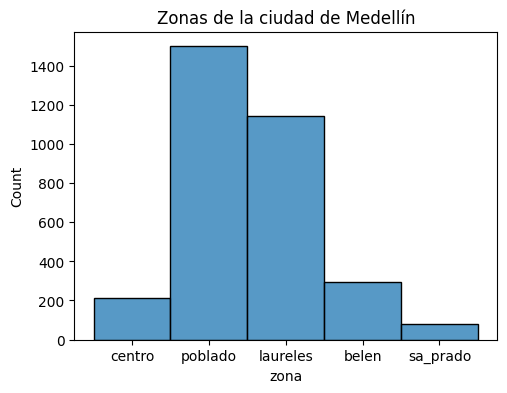

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
plt.title('Zonas de la ciudad de Medellín')
sns.histplot(complete_data['zona'])
plt.show()

En el gráfico anterior se puede visualizar la distribución de los datos de cada una de las zonas sobre las cuales se ejecutó el proceso de scraping. Se nota un claro desbalanceo de los datos que se debe tener en cuenta en la búsqueda del mejor modelo

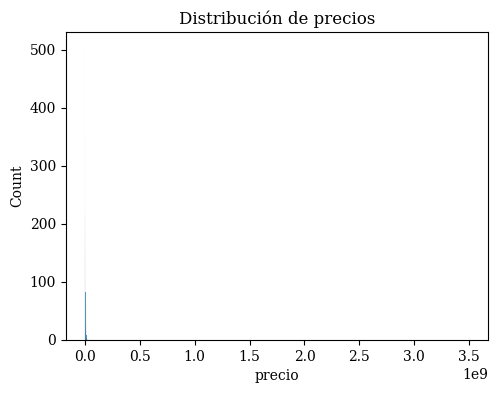

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
plt.title('Distribución de precios')
sns.histplot(complete_data['precio'])
plt.show()

Crear la base consolidada

In [31]:
complete_data = complete_data.drop(columns=['index'])
complete_data.to_csv("datos_arriendos_consolidado.csv", index=False)

**Conclusiones:**
- En el gráfico anterior se observa la distribución de los precios. Este nos muestra que hay valores a una escala muy superior al concentrado central de los datos, lo cual nos indica que se debe realizar un tratamiento de datos atípicos para obtener una mejor distribución de esta variable
- En esta parte finaliza el proceso de scraping creando una base consolidada datos_arriendos_consolidado.csv, con esta se da paso a la fase de modelados que consiste en el tratamiento de datos e iteraciones para encontrar el modelo que cumpla con las métricas del negocio